# Pacotes necessários e ELT

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from matplotlib.backends.backend_pdf import PdfPages # Salvar como PDF
from matplotlib.ticker import MaxNLocator

### Fazer upload  de arquivo

In [10]:
df = pd.read_csv('MonitoramentoEDiagns_DATA_2024-11-27_1052.csv')
df.head()

,record_id,visit_date,institution_name,postal_code,address,interviewed,residents_number,residents_bedroom,vehicle,normal_ilpi,...,internship_institution_3,internship_institution_4,internship_course,internship_course_2,internship_course_3,internship_course_4,regulao_complete,comments,comments_type,encerramento_complete
0,1,2024-10-29 09:19,2,74971451,"Rua José Leão Souza Filho, 122, Jardim Riviera...",Gleiciane Maria da Silva - responsável técnica,72,2,1,1,...,Não se aplica,Não se aplica,Técnico de Enfermagem,Não se aplica,Não se aplica,Não se aplica,2,1,As insatisfações com o município são enormes. ...,2
1,2,2024-10-29 13:38,3,74980050,"Rua Onze de Maio, S/N, Setor Central, Aparecid...","Luciane Aparecida das Chagas - coproprietária,...",19,2,2,1,...,Não se aplica,Não se aplica,Técnico de Enfermagem,Não se aplica,Não se aplica,Não se aplica,2,1,- Solicitam da equipe de pesquisa para a orga...,2
2,3,2024-11-05 13:19,4,74913510,"Rua Igarapé, S/N, Qd. 40, Lt. 02 a 04, Vila Al...",Eleny Lopes Rosa - Responsável Técnico,34,2,1,1,...,SESC,Não se aplica,Fisioterapia e Nutrição,Psicologia e Medicina,Cuidadores de idosos,Não se aplica,2,1,- Há irregularidades no fornecimento de frald...,2
3,4,2024-11-05 07:50,1,74920784,"Rua 15 de março, Qd. 3, Lt. 4, S/N, Parque Fla...",Antônio Gonçalves da Silva - responsável,18,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,Omissão do Estado,2
4,5,2024-10-11 14:30,5,74943150,"Avenida Graça Aranha, Qd. E, Lt. 15, Nova Bras...",Ludmila Ozan - responsável técnica,41,2,1,1,...,Não se aplica,Não se aplica,Psicologia,Não se aplica,Não se aplica,Não se aplica,2,1,Falta articulação com a rede de atenção à saúd...,2


In [17]:
# Suprimindo colunas
df = df.drop(columns=['record_id', 'caracterizao_da_ilpi_complete', 'profissionais_da_ilpi_complete', 'segurana_e_ambiente_complete', 'organizao_da_farmcia_complete',
                      'servio_lavanderia_complete', 'processos_de_cuidado_complete', 'regulao_complete', 'encerramento_complete'])
df

,visit_date,institution_name,postal_code,address,interviewed,residents_number,residents_bedroom,vehicle,normal_ilpi,nurse_aux,...,internship_institution,internship_institution_2,internship_institution_3,internship_institution_4,internship_course,internship_course_2,internship_course_3,internship_course_4,comments,comments_type
0,2024-10-29 09:19,2,74971451,"Rua José Leão Souza Filho, 122, Jardim Riviera...",Gleiciane Maria da Silva - responsável técnica,72,2,1,1,0.0,...,Colégio Suldamérica,Não se aplica,Não se aplica,Não se aplica,Técnico de Enfermagem,Não se aplica,Não se aplica,Não se aplica,1,As insatisfações com o município são enormes. ...
1,2024-10-29 13:38,3,74980050,"Rua Onze de Maio, S/N, Setor Central, Aparecid...","Luciane Aparecida das Chagas - coproprietária,...",19,2,2,1,0.0,...,Genotec-Genoma,Não se aplica,Não se aplica,Não se aplica,Técnico de Enfermagem,Não se aplica,Não se aplica,Não se aplica,1,- Solicitam da equipe de pesquisa para a orga...
2,2024-11-05 13:19,4,74913510,"Rua Igarapé, S/N, Qd. 40, Lt. 02 a 04, Vila Al...",Eleny Lopes Rosa - Responsável Técnico,34,2,1,1,1.0,...,Universidade Paulista,Centro Universitário Alfredo Nasser,SESC,Não se aplica,Fisioterapia e Nutrição,Psicologia e Medicina,Cuidadores de idosos,Não se aplica,1,- Há irregularidades no fornecimento de frald...
3,2024-11-05 07:50,1,74920784,"Rua 15 de março, Qd. 3, Lt. 4, S/N, Parque Fla...",Antônio Gonçalves da Silva - responsável,18,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Omissão do Estado
4,2024-10-11 14:30,5,74943150,"Avenida Graça Aranha, Qd. E, Lt. 15, Nova Bras...",Ludmila Ozan - responsável técnica,41,2,1,1,0.0,...,UNIP,Não se aplica,Não se aplica,Não se aplica,Psicologia,Não se aplica,Não se aplica,Não se aplica,1,Falta articulação com a rede de atenção à saúd...


# Distribuíção de Residentes nas ILPI's

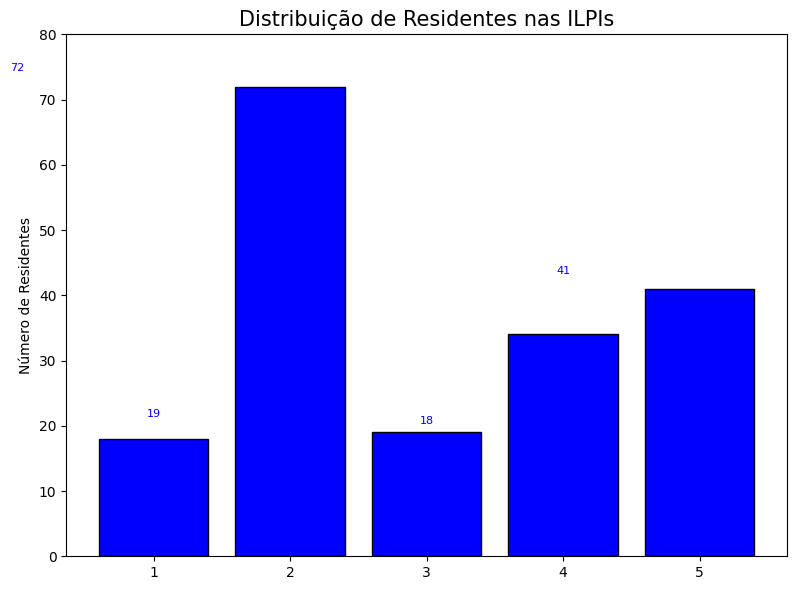

In [18]:
# Gráfico Distribuição de Residentes

# Ajusta o tamanho do gráfico (largura, altura)
plt.figure(figsize=(8, 6))

# Cria o gráfico de barras
plt.bar(x=df['institution_name'], height=df['residents_number'], color='blue', edgecolor='black')
plt.title('Distribuição de Residentes nas ILPIs', fontsize=15)
plt.ylabel('Número de Residentes')
#plt.xticks(ha='right', fontsize=10)  # Reduzindo a fonte do eixo X

# Define as divisões de 10 em 10, de 0 até 80
plt.ylim(0, 80)
plt.yticks(np.arange(0, 81, 10))

# Adicionando os valores das barras e ajustando a distância (v + 2) conforme necessário
for i, v in enumerate(df['residents_number']):
    plt.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=8, color='blue')

plt.tight_layout()
plt.savefig('distribuicao_residentes.png')
plt.show()